# Retraining the model

## Importing a new training data

In [1]:
import pandas as pd

df = pd.read_excel("./Database/DataBaseThermo.xlsx")

# Clean up the null data
df = df.dropna()

# Preprocessing

## Show the head of the data

In [2]:
df.head()

,material_id,formula_pretty,formula_anonymous,structure,uncorrected_energy_per_atom,energy_per_atom,formation_energy_per_atom,energy_above_hull,is_stable
0,mp-1219344,Sm4Fe34C3,A3B4C34,# generated using pymatgen\ndata_Sm4Fe34C3\n_s...,-8.179760,-8.179760,-0.020222,0.021925,False
1,mp-772625,Na2SnBAsO7,ABCD2E7,# generated using pymatgen\ndata_Na2SnBAsO7\n_...,-6.122041,-6.522791,-2.130426,0.077780,False
2,mp-1176858,Li8(CoO2)5,A5B8C10,# generated using pymatgen\ndata_Li8(CoO2)5\n_...,-5.347225,-6.002007,-1.634133,0.121999,False
3,mp-1199816,CuH12CN6Cl4O,ABCD4E6F12,# generated using pymatgen\ndata_CuH12CN6Cl4O\...,-5.007588,-5.219948,-0.562110,0.157094,False
4,mp-1200053,LuFe5P3,AB3C5,# generated using pymatgen\ndata_LuFe5P3\n_sym...,-7.764580,-7.764580,-0.751445,0.000000,True


In [4]:
# Additional information for the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154607 entries, 0 to 154609
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   material_id                  154607 non-null  object 
 1   formula_pretty               154607 non-null  object 
 2   formula_anonymous            154607 non-null  object 
 3   structure                    154607 non-null  object 
 4   uncorrected_energy_per_atom  154607 non-null  float64
 5   energy_per_atom              154607 non-null  float64
 6   formation_energy_per_atom    154607 non-null  float64
 7   energy_above_hull            154607 non-null  float64
 8   is_stable                    154607 non-null  bool   
dtypes: bool(1), float64(4), object(4)
memory usage: 10.8+ MB


In [6]:
# Checking the statistical value of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
uncorrected_energy_per_atom,154607.0,-9.097739,7.785031,-86.356348,-8.166404,-6.670235,-5.473184,-0.030166
energy_per_atom,154607.0,-9.103890,7.567719,-86.356348,-8.432188,-7.139921,-5.784004,-0.030166
formation_energy_per_atom,154607.0,-1.441602,1.198904,-11.864228,-2.424041,-1.541894,-0.491482,9.039157
energy_above_hull,154607.0,0.176498,0.454604,0.000000,0.002421,0.049121,0.147071,9.703381


In [7]:
# Clean up duplicates
print(f"Before drop duplicates: {df.shape}")
df = df.drop_duplicates()
print(f"After drop duplicates: {df.shape}")

Before drop duplicates: (154607, 9)
After drop duplicates: (154607, 9)


## Inspecting the energy formation

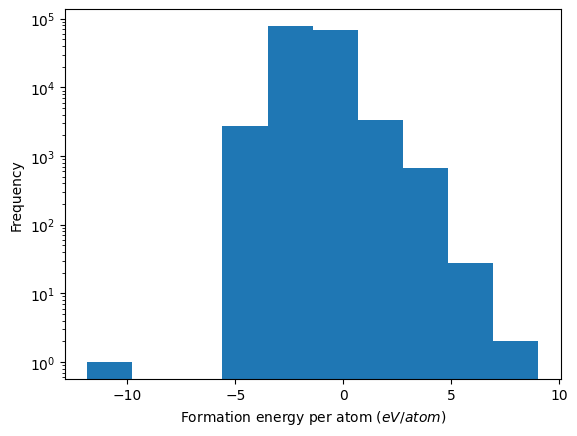

In [23]:
# Plotting the energy formation in Histogram

import matplotlib.pyplot as plt

plt.hist(df['formation_energy_per_atom'])

# Change the scale into log
plt.yscale('log')
plt.xlabel(r'Formation energy per atom ($eV/atom$)')
plt.ylabel('Frequency')
plt.savefig('./Images/NewProgress/HistFormEBeforeFilter.png')
plt.show()

In [21]:
# Inspecting the statistical value of formation energy

df.describe().T.iloc[2]

count    154607.000000
mean         -1.441602
std           1.198904
min         -11.864228
25%          -2.424041
50%          -1.541894
75%          -0.491482
max           9.039157
Name: formation_energy_per_atom, dtype: float64

## Filtering the energy formation

In [25]:
## Filtering the formation energy into less than -1 but greater than -3

df_filt = df.copy()
df_filt = df_filt[df_filt['formation_energy_per_atom'] < 0]
df_filt = df_filt[df_filt['formation_energy_per_atom'] > -3]

print(f"Number of data before filter: {df.shape}")
print(f"Number of data after filter: {df_filt.shape}")
print(f"Number of data that is thrown: {df.shape[0]-df_filt.shape[0]}")

Number of data before filter: (154607, 9)
Number of data after filter: (127949, 9)
Number of data that is thrown: 26658


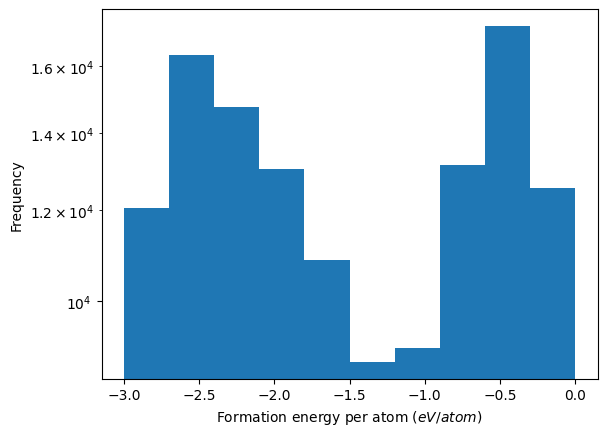

In [26]:
# Showing the current histogram image
import matplotlib.pyplot as plt

plt.hist(df_filt['formation_energy_per_atom'])

# Change the scale into log
plt.yscale('log')
plt.xlabel(r'Formation energy per atom ($eV/atom$)')
plt.ylabel('Frequency')
plt.savefig('./Images/NewProgress/HistFormEAfterFilter.png')
plt.show()

In [28]:
# Inspecting the filtered statistical value of formation energy

df_filt.describe().T.iloc[2]

count    127949.000000
mean         -1.512169
std           0.897662
min          -2.999996
25%          -2.333921
50%          -1.591459
75%          -0.641214
max          -0.000029
Name: formation_energy_per_atom, dtype: float64

## Explanation for the filtering

In this study, we recognize the pivotal role of thoughtful data preprocessing in achieving reliable and accurate results in machine learning. In our specific context, we have deliberately chosen to narrow our focus to a specific range of formation energy per atom, specifically from -3 to 0 eV/atom. Allow me to elaborate on the rationale behind this decision:

1. Understanding the Range:
    - The formation energy per atom signifies the energy required to assemble a crystal structure from its constituent atoms. This property holds immense significance in materials science and computational chemistry.
    - By restricting our analysis to the range from -3 to 0 eV/atom, we intentionally target energies relevant to stable or near-stable materials. Negative values denote exothermic reactions (energy release), while positive values indicate endothermic reactions (energy absorption).
2. Minimal Standard Deviation (STD):
    - Our observation reveals that the STD within this specific range is remarkably low. This finding implies that the data points in this interval exhibit consistency and tight clustering.
    - A diminished STD offers advantages for machine learning algorithms. When data points are less dispersed, models can learn effectively without undue influence from extreme outliers.
3. Generalization and Model Performance:
    - Generalization, the ability of a model to perform well on unseen data beyond the training set, is a critical goal.
    - The minimal STD within our chosen range suggests that the data points represent the broader distribution more faithfully. Models trained on such data are likely to generalize better to new samples.
    - Our deliberate focus on this narrow interval prioritizes stability and consistency, potentially enhancing predictive performance.
4. Trade-Offs and Context:
    - While a minimal STD is desirable, we must weigh the trade-offs. Narrowing the range may inadvertently exclude valuable information lying outside these bounds.
    - Context matters: Consider whether materials with energies beyond this range are relevant to our research objectives. Striking the right balance is crucial.

# Performing Training to Machine Learning

## Training using Formula Based Descriptors

In [33]:
from matminer.featurizers.conversions import StrToComposition

df_filt_comp = df_filt.copy()
df_filt_comp = StrToComposition().featurize_dataframe(df_filt, "formula_pretty", ignore_errors=True)


StrToComposition: 100%|██████████| 127949/127949 [01:06<00:00, 1924.96it/s]


In [34]:
# Showing the head data
df_filt_comp.head()

,material_id,formula_pretty,formula_anonymous,structure,uncorrected_energy_per_atom,energy_per_atom,formation_energy_per_atom,energy_above_hull,is_stable,composition
0,mp-1219344,Sm4Fe34C3,A3B4C34,# generated using pymatgen\ndata_Sm4Fe34C3\n_s...,-8.179760,-8.179760,-0.020222,0.021925,False,"(Sm, Fe, C)"
1,mp-772625,Na2SnBAsO7,ABCD2E7,# generated using pymatgen\ndata_Na2SnBAsO7\n_...,-6.122041,-6.522791,-2.130426,0.077780,False,"(Na, Sn, B, As, O)"
2,mp-1176858,Li8(CoO2)5,A5B8C10,# generated using pymatgen\ndata_Li8(CoO2)5\n_...,-5.347225,-6.002007,-1.634133,0.121999,False,"(Li, Co, O)"
3,mp-1199816,CuH12CN6Cl4O,ABCD4E6F12,# generated using pymatgen\ndata_CuH12CN6Cl4O\...,-5.007588,-5.219948,-0.562110,0.157094,False,"(Cu, H, C, N, Cl, O)"
4,mp-1200053,LuFe5P3,AB3C5,# generated using pymatgen\ndata_LuFe5P3\n_sym...,-7.764580,-7.764580,-0.751445,0.000000,True,"(Lu, Fe, P)"


In [35]:
# Save the DataFrame to Excel
df_filt_comp.to_excel("./Database/NewProgress/Filtered_Composition.xlsx", index=False)
print("File saved")

File saved


## Extraction all descriptors

In [37]:
from matminer.featurizers.composition import ElementFraction

# Formula fraction descriptors
df_fraction = df_filt_comp.copy()
df_fraction = ElementFraction().featurize_dataframe(df_fraction, col_id="composition", ignore_errors=True) # input the "composition" column to the featurizer

ElementFraction: 100%|██████████| 127949/127949 [03:53<00:00, 548.86it/s]


In [38]:
from matminer.featurizers.composition import ElementProperty

# Element Property Magpie Descriptors
df_magpie = df_filt_comp.copy()

ep_feat = ElementProperty.from_preset(preset_name="magpie")
df_magpie = ep_feat.featurize_dataframe(df_magpie, col_id="composition", ignore_errors=True) 

ElementProperty: 100%|██████████| 127949/127949 [05:37<00:00, 379.38it/s]



In [39]:
# Element Property Matminer Descriptor
df_matminer = df_filt_comp.copy()

ep_matminer = ElementProperty.from_preset(preset_name="matminer")
df_matminer = ep_matminer.featurize_dataframe(df_matminer, col_id="composition", ignore_errors=True)

ElementProperty:  36%|███▌      | 46220/127949 [02:55<05:24, 251.61it/s]/home/andi/.local/lib/python3.8/site-packages/pymatgen/core/periodic_table.py:209: UserWarning: No electronegativity for He. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(
ElementProperty:  56%|█████▌    | 71476/127949 [04:38<03:49, 246.20it/s]/home/andi/.local/lib/python3.8/site-packages/pymatgen/core/periodic_table.py:209: UserWarning: No electronegativity for He. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn(
ElementProperty: 100%|██████████| 127949/127949 [08:53<00:00, 239.62it/s]

In [41]:
# Element Property DEML Descriptor
df_deml = df_filt_comp.copy()

ep_deml = ElementProperty.from_preset(preset_name="deml")
df_deml = ep_deml.featurize_dataframe(df_deml, col_id="composition", ignore_errors=True)

ElementProperty: 100%|██████████| 127949/127949 [05:18<00:00, 402.24it/s]



In [42]:
# Element Property Matscholar Descriptor
df_matscholar = df_filt_comp.copy()

ep_matscholar = ElementProperty.from_preset(preset_name="matscholar_el")
df_matscholar = ep_matscholar.featurize_dataframe(df_matscholar, col_id="composition", ignore_errors=True)


ElementProperty: 100%|██████████| 127949/127949 [16:25<00:00, 129.82it/s]



In [43]:
# Cleaning up all the null value

df_matscholar = df_matscholar.dropna()
df_deml = df_deml.dropna()
df_matminer = df_matminer.dropna()
df_magpie = df_magpie.dropna()
df_fraction = df_fraction.dropna()

# Save all of the DataFrame to Excel
df_matscholar.to_excel("./Database/NewProgress/Descrip_Matscholar.xlsx", index=False)
df_deml.to_excel("./Database/NewProgress/Descrip_DEML.xlsx", index=False)
df_matminer.to_excel("./Database/NewProgress/Descrip_Matminer.xlsx", index=False)
df_magpie.to_excel("./Database/NewProgress/Descrip_Magpie.xlsx", index=False)
df_fraction.to_excel("./Database/NewProgress/Descrip_Fraction.xlsx", index=False)

print("File saved")

File saved


## Descriptors Description

1. Deml:
    - The Deml preset provides a set of elemental properties suitable for materials science applications.
    - It includes features related to electronegativity, atomic radius, and other relevant attributes.

2. Matminer:
    - The Matminer preset covers a broad range of elemental properties, making it versatile for various research contexts.
    - It includes features related to atomic weights, electronegativity, and more.
    
3. Matscholar_el:
    - The Matscholar_el preset focuses on elemental properties relevant for materials informatics and scholarly research.
    - It includes features related to atomic weights, electronegativity, and more.

## Preparing data to train

In [44]:
import numpy as np

df_matscholar = df_matscholar.dropna()
df_deml = df_deml.dropna()
df_matminer = df_matminer.dropna()
df_magpie = df_magpie.dropna()
df_fraction = df_fraction.dropna()

excluded = np.array(df.columns)
y_matscholar = df_matscholar['formation_energy_per_atom']
y_deml = df_deml['formation_energy_per_atom']
y_matminer = df_matminer['formation_energy_per_atom']
y_magpie = df_magpie['formation_energy_per_atom']
y_fraction = df_fraction['formation_energy_per_atom']

X_magpie = df_magpie.drop(excluded, axis=1)
X_fraction = df_fraction.drop(excluded, axis=1)
X_matscholar = df_matscholar.drop(excluded, axis=1)
X_deml = df_deml.drop(excluded, axis=1)
X_matminer = df_matminer.drop(excluded, axis=1)

_, feat_col_magpie = X_magpie.shape
_, feat_col_fraction = X_fraction.shape
_, feat_col_matscholar = X_matscholar.shape
_, feat_col_deml = X_deml.shape
_, feat_col_matminer = X_matminer.shape

magpie = np.array(X_magpie.columns.values)
fraction = np.array(X_fraction.columns.values)
matscholar = np.array(X_matscholar.columns.values)
deml = np.array(X_deml.columns.values)
matminer = np.array(X_matminer.columns.values)

np.save("TrainingData/NewProgress/X_magpie.npy", magpie)
np.save("TrainingData/NewProgress/X_fraction.npy", fraction)
np.save("TrainingData/NewProgress/X_matscholar.npy", matscholar)
np.save("TrainingData/NewProgress/X_deml.npy", deml)
np.save("TrainingData/NewProgress/X_matminer.npy", matminer)

np.save("TrainingData/NewProgress/y_magpie.npy", y_magpie)
np.save("TrainingData/NewProgress/y_fraction.npy", y_fraction)
np.save("TrainingData/NewProgress/y_matscholar.npy", y_matscholar)
np.save("TrainingData/NewProgress/y_deml.npy", y_deml)
np.save("TrainingData/NewProgress/y_matminer.npy", y_matminer)